<a href="https://colab.research.google.com/github/18521564/CS114.K21/blob/master/BAO_CAO_CUOI_KI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ĐỒ ÁN KẾT THÚC MÔN: HỌC MÁY

NHÓM SINH VIÊN:

18521564 - Nguyễn Hữu Trường

---------------Giới thiệu vấn đề--------------
CIFAR-10 CLASSIFICATION SỬ DỤNG LOGISTIC REGRESSION VÀ CNN.

VGG16 CHO CIFAR-10:

1.Mô tả bộ dữ liệu:
Gồm 60000 ảnh 32x32 3 kênh màu RGB chia thành  10 classes. Mỗi class gồm 6000 ảnh. Nguồn : "https://www.cs.toronto.edu/~kriz/cifar.html"
10 classes bao gồm, theo thứ tự:
0. máy bay airplane
1. xe hơi automobile
2. chim bird
3. mèo cat
4. hươu deer
5. chó dog
6. ếch frog
7. ngựa horse
8. tàu(hàng thủy) ship
9. xe tải truck

2.Bài toán:
Đưa vào một tấm ảnh mà model chưa gặp và có thể phân loại nó vào 1 trong 10 classes trên.



PHẦN LOGISTIC REGRESSION


1.Cài đặt thư viện:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from six.moves import cPickle 
import tensorflow as tf
from keras.datasets import cifar10
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import label_binarize
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


2.Tải dữ liệu:

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

print(x_train.shape)
print(y_train.shape)

#y_train = label_binarize(y_train, classes=[0,1,2,3,4,5,6,7,8,9])
#y_test = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7,8,9])
X_train=x_train.reshape(50000, 3*32*32)
X_test=x_test.reshape(10000,3*32*32)
print(X_train.shape)
print(y_train.shape)


170500096/170498071 [==============================] - 11s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples
(50000, 32, 32, 3)
(50000, 1)
(50000, 3072)
(50000, 1)


3. Tiền xử lý dữ liệu:


In [3]:
#data preprocessing bằng standard scaler:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

4.TRAINING MODEL

In [4]:
from sklearn.linear_model import LogisticRegression
Cfier = LogisticRegression(random_state =0)
Cfier.fit(X_train,y_train) 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

5.THỂ HIỆN KẾT QUẢ:

In [5]:
import itertools
#hàm vẽ confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
 
    print(cm)
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


Confusion matrix, without normalization
[[2610  263  186  211  126  171  146  252  707  328]
 [ 253 2713  136  184  119  148  205  223  328  691]
 [ 419  193 1651  436  569  445  566  371  223  127]
 [ 232  253  416 1770  264  833  572  211  196  253]
 [ 261  130  613  355 1868  375  643  480  128  147]
 [ 194  202  468  852  359 1909  423  266  177  150]
 [  75  165  383  614  455  384 2569  170   74  111]
 [ 197  173  316  339  462  325  211 2499  131  347]
 [ 722  306  127  158   65  154   62   86 2882  438]
 [ 321  741  123  151   90  130  212  225  377 2630]]


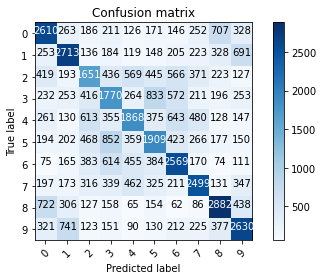

In [6]:
from sklearn.metrics import confusion_matrix
#vẽ confusion matrix trên tập train
cm = confusion_matrix(y_train, Cfier.predict(X_train))
plot_confusion_matrix(cm,["0","1","2","3","4","5","6","7","8","9"])
plt.show()

Các độ chính xác:
Accuracy = TP+TN/TP+FP+FN+TN
precision: tp / tp + fp mức "bảo thủ" của dự đoán positive, giảm thiểu false negative, not to predict a positive negative
recall: tp / tp + fn khả năng tìm được positive

nếu khả năng tìm được và mức bảo thủ cùng cao ngang nhau thì mô hình phân loại tốt.

In [10]:
#độ chính xác trên tập train:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("accuracy: ",accuracy_score(y_train,Cfier.predict(X_train)))


accuracy:  0.46202


Confusion matrix, without normalization
[[643   7   3   0   3  17   3  16 274  34]
 [219 166   2   5   4  39   7  32 346 180]
 [390   8  79   0  33 205  15  61 188  21]
 [318  11   7  19  21 273  10  29 233  79]
 [284   6  33   1 125 232  15 109 167  28]
 [304  11  14  15  18 333   7  53 205  40]
 [226   6  31  23  44 287 104  53 176  50]
 [285   4   7   2  16 108   2 308 180  88]
 [216   8   1   0   0  14   1   2 720  38]
 [236  23   1   3   1  33   7  23 293 380]]


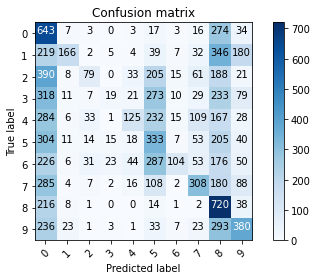

In [ ]:
#vẽ confusion matrix trên tập test:
cm = confusion_matrix(y_test, Cfier.predict(X_test))
plot_confusion_matrix(cm,["0","1","2","3","4","5","6","7","8","9"])
plt.show()

In [ ]:
#độ chính xác trên tập test:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,Cfier.predict(X_test)))

0.2877


PHẦN CNN

Phần 1: Cài đặt các thông số cố định và tải bộ dữ liệu:
Để thư viện và thông số cố định trong một phần riêng để dễ dàng cho việc chỉnh sửa sau này.


In [ ]:
#import thư viện
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from keras.callbacks import ModelCheckpoint

#thông số ảnh của bộ dữ liệu:
IMG_CHANNELS = 3 #số kênh màu
IMG_ROWS = 32 #chiều ngang
IMG_COLS = 32 #chiều dọc
#các thông số sử dụng sau này:
BATCH_SIZE = 64 #số lượng dữ liệu trong một mini-batch
EPOCHS = 50 #số lần lặp lại training với cùng dữ liệu train
NUM_CLASSES = 10 #số classes đầu ra
VERBOSE = 1 #cách hiển thị để theo dõi quá trình training 
OPTIM = tf.keras.optimizers.RMSprop() #thuật toán tối ưu lặp lại, ở đây ta dùng RMSprop 


Phần 2: Tải và tiền xử lý data
+ Sử dụng mean và standard deviation của tập train để chuẩn hóa cả tập train và test
+ dùng to_categorical để xử lý label

In [ ]:
#hàm tải data bao gồm việc chuẩn hóa và xử lý to_categorical với các label
def load_data():
 (x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
 #show ảnh thử:
 num_row = 3
 num_col = 5

 fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
 fig.suptitle("15 ảnh minh họa", fontsize=16)
 for i in range(num_row * num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(X_train[i], cmap='gray')
 plt.tight_layout()
 plt.show()

 x_train = x_train.astype('float32')
 x_test = x_test.astype('float32')
 # normalize: chuẩn hóa bằng mean và standard deviation của tập train, tập test sử dụng mean và std từ tập train
 mean = np.mean(x_train,axis=(0,1,2,3))
 std = np.std(x_train,axis=(0,1,2,3))
 x_train = (x_train-mean)/(std+1e-7)
 x_test = (x_test-mean)/(std+1e-7)
 y_train = tf.keras.utils.to_categorical(y_train,NUM_CLASSES)
 y_test = tf.keras.utils.to_categorical(y_test,NUM_CLASSES)
 return x_train, y_train, x_test, y_test


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

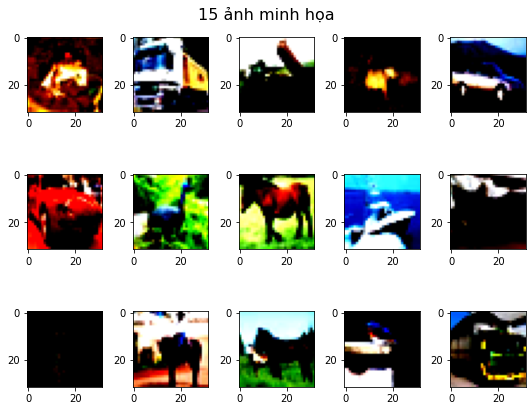

In [ ]:
#lấy data:
(X_train, y_train, X_test, y_test) = load_data()

Phần 2: 

2.1 Xây dựng model
+ Model đơn giản:
với 3 block VGG. Mỗi block gồm 2 convolutional layers với filter (3x3) và một max pooling (2x2). Số lượng filter tăng dần từ 32, 64, 128.

2.2 Kỹ thuật Regurlazation giảm overfitting:
+ Batch normalization: chuẩn hóa output với mean = 0 và std = 1.
+ Dropping: ngẫu nhiên loại bỏ bớt node trong các lớp, với tỉ lệ khác nhau và tăng dần. 
+ Data augmentation: tạo data mới từ data cũ bằng cách xoay, di chuyển, vvv.

2.3 Chuẩn bị model:
+ loss function: categorical_crossentropy
+ thuật toán tối ưu: RMSprop


In [ ]:
#hàm cài đặt model, dùng hàm thuận tiện cho việc sửa đổi và tái sử dụng
def basic_VGG_model(INPUT_SHAPE,CLASSES):
    model = models.Sequential()
    
    #1st blocl
    model.add(layers.Conv2D(32, (3,3), padding='same', 
        input_shape=INPUT_SHAPE, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.2))

    #2nd block
    model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.3))

    #3d block 
    model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.4))

    #dense  
    model.add(layers.Flatten())
    model.add(layers.Dense(CLASSES, activation='softmax'))
    return model

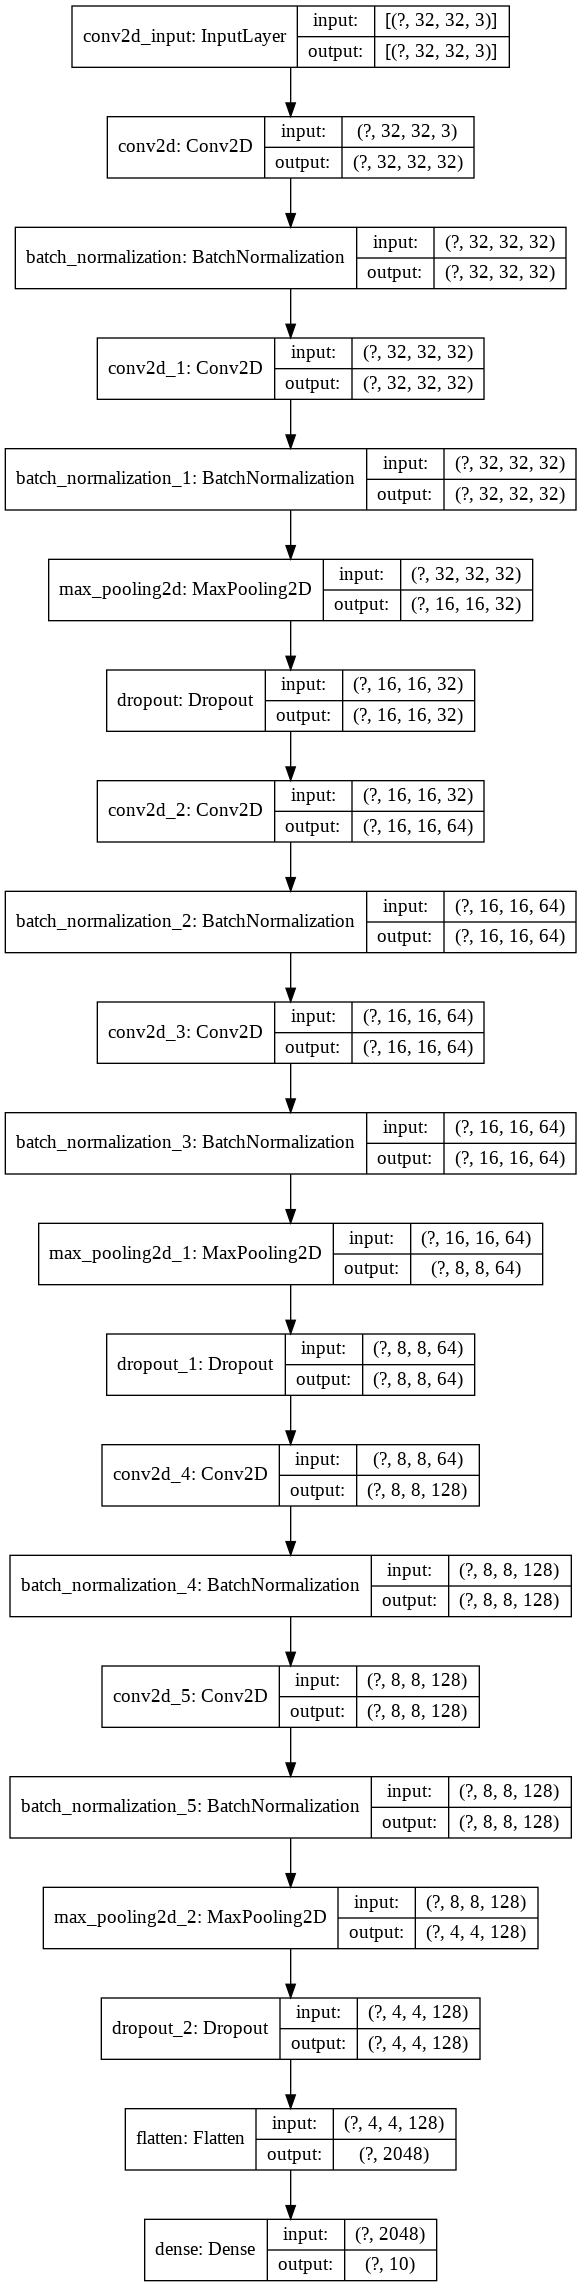

In [ ]:
#Tạo model từ hàm:
model = basic_VGG_model((IMG_ROWS, IMG_COLS, IMG_CHANNELS), NUM_CLASSES)
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
)

In [ ]:
# compiling model:
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,
	metrics=['accuracy'])

Phần 3: Training

Ta có tập train, test và tập validation
+ train : 50000
+ test : 10000
+ validation: 20%

Sử dụng kỹ thuật data augmentation.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#image augmentation
datagen = ImageDataGenerator(
 rotation_range=30,
 width_shift_range=0.2,
 height_shift_range=0.2,
 horizontal_flip=True,
 )
datagen.fit(X_train)

#con trỏ:
iterator = datagen.flow(X_train, y_train,
 batch_size=BATCH_SIZE)

In [ ]:
#tạo checkpoint lưu model:
checkpoint_path = "/content/drive/My Drive/doAn/my_first_model.ckpt"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [ ]:
#training:
model.fit_generator(iterator,
 epochs=EPOCHS,
 verbose=1,validation_data=(X_test,y_test),callbacks = [cp_callback])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
782/782 [==============================] - ETA: 0s - loss: 2.0931 - accuracy: 0.3631
Epoch 00001: saving model to /content/drive/My Drive/doAn/my_first_model.ckpt
782/782 [==============================] - 446s 571ms/step - loss: 2.0931 - accuracy: 0.3631 - val_loss: 1.7140 - val_accuracy: 0.4619
Epoch 2/50
782/782 [==============================] - ETA: 0s - loss: 1.5633 - accuracy: 0.4955
Epoch 00002: saving model to /content/drive/My Drive/doAn/my_first_model.ckpt
782/782 [==============================] - 454s 581ms/step - loss: 1.5633 - accuracy: 0.4955 - val_loss: 1.3906 - val_accuracy: 0.5656
Epoch 3/50
782/782 [==============================] - ETA: 0s - loss: 1.3597 - accuracy: 0.5593
Epoch 00003: saving model to /content/drive/My Drive/doAn/my_first_model.ckpt
782/782 [==============================] - 457s 584ms/step - loss: 1.3597 - accuracy: 0.5593 - val_loss: 1.3035 - val_accuracy: 0.59

In [ ]:
#lưu model ở dạng json
#lưu weight ở dạng h5
model_json = model.to_json()
with open('model.json', 'w') as json_file:
 json_file.write(model_json)
model.save_weights('model.h5') 

In [ ]:
import numpy as np
#import scipy.misc

from skimage.transform import resize
from imageio import imread

from tensorflow.keras.models import model_from_json
from tensorflow.keras.optimizers import SGD

In [ ]:
#tái sử dụng lại model:
model_architecture = "/content/drive/My Drive/doAn/Do_an_real/model.json"
model_weights = "/content/drive/My Drive/doAn/Do_an_real/model.h5"
model = model_from_json(open(model_architecture).read())
model.load_weights(model_weights)

#tái compile:
optim = SGD()
model.compile(loss="categorical_crossentropy", optimizer=optim, metrics=["accuracy"])

In [ ]:
scores = model.evaluate(X_test, y_test, batch_size=128, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0])) 

79/79 [==============================] - 18s 223ms/step - loss: 0.4660 - accuracy: 0.8502

Test result: 85.020 loss: 0.466


In [ ]:
import numpy as np
#import scipy.misc

from skimage.transform import resize
from imageio import imread

from tensorflow.keras.models import model_from_json
from tensorflow.keras.optimizers import SGD

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


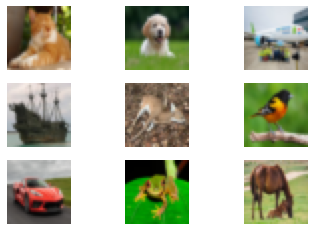

In [ ]:
img_names = ["/content/drive/My Drive/doAn/Do_an_real/meo.jpg",
             "/content/drive/My Drive/doAn/Do_an_real/dog.jpg",
             "/content/drive/My Drive/doAn/Do_an_real/bamboo.jpg"
             ,"/content/drive/My Drive/doAn/Do_an_real/caribean_pirate.jpg",
             "/content/drive/My Drive/doAn/Do_an_real/deer.jpg",
             "/content/drive/My Drive/doAn/Do_an_real/_108857562_mediaitem108857561.jpg",
             "/content/drive/My Drive/doAn/Do_an_real/car.jpg",
             "/content/drive/My Drive/doAn/Do_an_real/tải xuống (4).jpg",
             "/content/drive/My Drive/doAn/Do_an_real/tải xuống (5).jpg"
             ]
imgs = [resize(imread(img_name), (32, 32)).astype("float32") for img_name in img_names]
mean = np.mean(X_train,axis=(0,1,2,3))
std = np.std(X_train,axis=(0,1,2,3))
imgs = (imgs-mean)/(std+1e-7)

fig, ax = plt.subplots(3, 3)
for i, axi in enumerate(ax.flat):
    axi.imshow(imgs[i], cmap='gray')
    axi.axis('off')


In [ ]:
predictions = model.predict_classes(imgs)
print("predictions:", predictions)
#sai 3 tấm cuối cùng

predictions: [3 5 0 8 4 2 0 4 4]


PHẦN NHẬN XÉT:

VỀ LOGISTIC REGRESSION:
THỜI GIAN TRAINING 30 PHÚT.
ĐỘ CHÍNH XÁC ĐO THEO ACCURACY SCORE:
+ Ở TẬP TRAIN: 0.46
+ Ở TẬP TEST: 0.29
ĐỘ CHÍNH XÁC Ở TẬP TRAIN CAO HƠN TẬP TEST. 
NHẬN XÉT: DO MODEL CÓ ĐỘ PHỨC TẠP THẤP DẪN TỚI OVERFITTING.

VỀ CNN: 
THỜI GIAN TRAINING 6 TIẾNG.
ĐỘ CHÍNH XÁC Ở CẢ TẬP TRAIN VÀ TEST XẤP XỈ NHAU(85 %). KẾT QUẢ KHI DÙNG ẢNH BÊN NGOÀI ĐỂ PREDICT THỬ CŨNG TƯƠNG(ĐOÁN ĐƯỢC 3 TRÊN 10 ẢNH). KHÔNG CÓ OVERFITTING. 

NHẬN XÉT CHUNG: CNN THỂ HIỆN NỔI TRỘI HƠN LOGISTIC REGRESSION RẤT NHIỀU.